In [1]:
cities =[11003.611100	,	42102.500000	,
11108.611100	,	42373.888900	,
11133.333300	,	42885.833300	,
11155.833300	,	42712.500000	,
11183.333300	,	42933.333300	,
11297.500000	,	42853.333300	,
11310.277800	,	42929.444400	,
11416.666700	,	42983.333300	,
11423.888900	,	43000.277800	,
11438.333300	,	42057.222200	,
11461.111100	,	43252.777800	,
11485.555600	,	43187.222200	,
11503.055600	,	42855.277800	,
11511.388900	,	42106.388900	,
11522.222200	,	42841.944400	,
11569.444400	,	43136.666700	,
11583.333300	,	43150.000000	,
11595.000000	,	43148.055600	,
11600.000000	,	43150.000000	,
11690.555600	,	42686.666700	,
11715.833300	,	41836.111100	,
11751.111100	,	42814.444400	,
11770.277800	,	42651.944400	,
11785.277800	,	42884.444400	,
11822.777800	,	42673.611100	,
11846.944400	,	42660.555600	,
11963.055600	,	43290.555600	,
11973.055600	,	43026.111100	,
12058.333300	,	42195.555600	,
12149.444400	,	42477.500000	,
12286.944400	,	43355.555600	,
12300.000000	,	42433.333300	,
12355.833300	,	43156.388900	,
12363.333300	,	43189.166700	,
12372.777800	,	42711.388900	,
12386.666700	,	43334.722200	,
12421.666700	,	42895.555600	,
12645.000000	,	42973.333300	]

In [2]:
from math import sqrt
import numpy as np

coordinates = np.reshape(cities, (int(len(cities)/2), 2))
coordinates.tolist()
x = coordinates[:,0]
y = coordinates[:,1]

cost_matrix = np.empty([len(x),len(y)])
for i in range(len(x)):
    for j in range(len(x)):
        if i == j:
            cost_matrix[i][j] = int(999999999)
            
        else:
            cost_matrix[i][j] = sqrt((x[i]-x[j])**2 + (y[i]-y[j])**2)

cost_matrix = cost_matrix.tolist()

n = len(cost_matrix)

In [3]:
cost_matrix

[[999999999.0,
  290.99301545433866,
  794.0018312710164,
  628.7062892741252,
  850.0494347752532,
  806.3010169484456,
  881.9759098638978,
  972.873183452112,
  991.2811948915838,
  437.07375847296123,
  1237.9197337359349,
  1186.9678817276742,
  903.3931728506114,
  507.7926916725464,
  903.1807647058093,
  1178.8418412907574,
  1197.2193112261596,
  1201.2191072966534,
  1205.3779366004712,
  901.7446864102617,
  760.410092131903,
  1032.2892417783694,
  943.2215951621602,
  1105.6400293858078,
  998.6000054737141,
  1011.2552138704898,
  1527.0919609740627,
  1338.9847283010597,
  1058.8192781887758,
  1205.6363263392866,
  1793.625572849654,
  1337.936789400792,
  1714.40563803204,
  1740.6001775427158,
  1498.45358451041,
  1852.3537304910717,
  1624.7519408767353,
  1858.0926127166258],
 [290.99301545433866,
  999999999.0,
  512.5409796925513,
  341.88801268259067,
  564.4124767084799,
  515.311506988317,
  591.0256944238062,
  682.8768039571414,
  701.258258572444,
  457.159

In [4]:
"""Simple travelling salesman problem between cities."""

from __future__ import print_function
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
from time import time



def create_data_model(cost_matrix):
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = cost_matrix # yapf: disable
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data


def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print('Objective: {} miles'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    trajectory = []
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        trajectory.append(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {}miles\n'.format(route_distance)
    return trajectory



"""Entry point of the program."""
# Instantiate the data problem.
data = create_data_model(cost_matrix)

# Create the routing index manager.
manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                       data['num_vehicles'], data['depot'])

# Create Routing Model.
routing = pywrapcp.RoutingModel(manager)


def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['distance_matrix'][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)

# Define cost of each arc.
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# Setting first solution heuristic.
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

t1 = time()
# Solve the problem.
solution = routing.SolveWithParameters(search_parameters)
t2 = time()

current_time = t2 -t1

# Print solution on console.
trajectory =  print_solution(manager, routing, solution)

# Close the trajectory loop
trajectory.append(trajectory[0])

Objective: 6645 miles
Route for vehicle 0:
 0 -> 1 -> 3 -> 2 -> 4 -> 5 -> 6 -> 7 -> 8 -> 10 -> 11 -> 15 -> 16 -> 17 -> 18 -> 12 -> 14 -> 19 -> 22 -> 25 -> 24 -> 21 -> 23 -> 27 -> 26 -> 30 -> 35 -> 33 -> 32 -> 37 -> 36 -> 34 -> 31 -> 29 -> 28 -> 20 -> 13 -> 9 -> 0



In [ ]:
# The distance calculated by OR-Tools seems to be buged. Let's calculate it again
# Calculate the real distance:
distance = 0

for i in range(len(trajectory)-1):
    j = trajectory[i]
    k = trajectory[i+1]
    local_distance = sqrt((x[j]-x[k])**2 + (y[j]-y[k])**2)
    distance += local_distance

In [5]:
# Create lists to draw trajectory on a plot
xlist=[]
ylist=[]
for i in range(len(trajectory)):
    ref_ = trajectory[i]
    xlist.append(x[ref_])
    ylist.append(y[ref_])

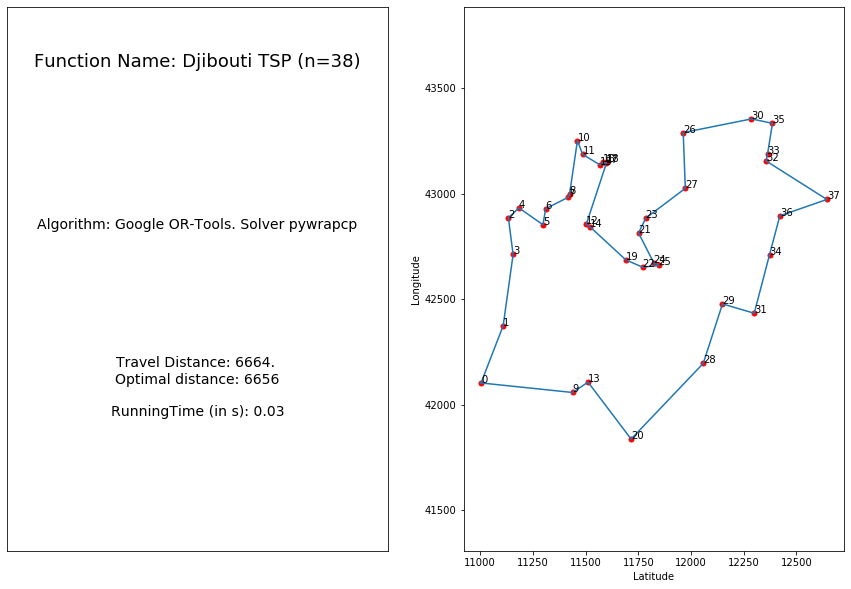

In [16]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

# Create 2x2 sub plots
gs = gridspec.GridSpec(1, 2)

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
ax1.text(0.5, 0.9,"Function Name: {}".format("Djibouti TSP (n=38)"), fontsize=18,  horizontalalignment='center', verticalalignment='center') 
ax1.text(0.5, 0.6,"Algorithm: {}".format("Google OR-Tools. Solver pywrapcp"), fontsize=14,  horizontalalignment='center', verticalalignment='center') 
ax1.text(0.5, 0.3,"Travel Distance: {}. \nOptimal distance: 6656\n\nRunningTime (in s): {:.2f}".format(int(distance), current_time), fontsize=14,  horizontalalignment='center', verticalalignment='center') 
ax1.tick_params(axis='x', which='both', bottom=False,  top=False, labelbottom=False)
ax1.tick_params(axis='y', which='both', left=False,  right=False, labelleft=False)

ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1

ax2.scatter(x, y, s=100, c= 'red', marker='.')
z = np.arange(0,38,1)
for i, txt in enumerate(z):
    ax2.annotate(txt, (x[i], y[i]))

ax2.plot(xlist, ylist, linestyle='-')
ax2.set_xlabel("Latitude")
ax2.set_ylabel("Longitude")
ax2.axis('equal')



fig.savefig('Djibouti_TSP.png')

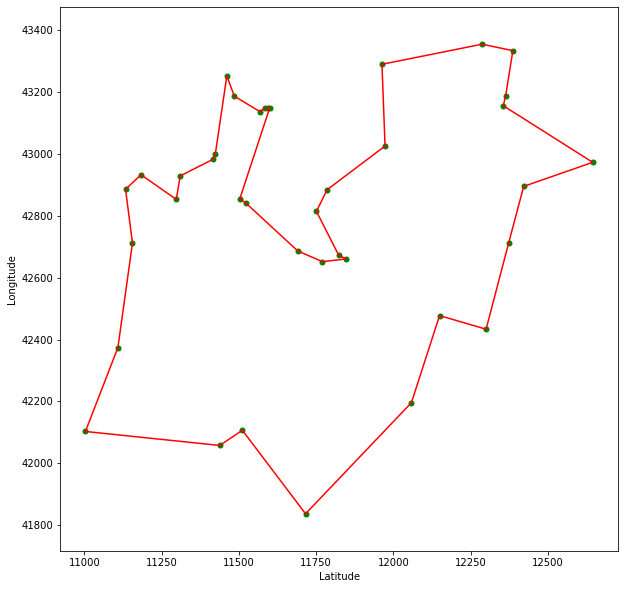

In [28]:
# A Higher quality
plt.figure(figsize=(10,10))
plt.scatter(x, y, s=100, c= 'green', marker='.')
plt.plot(xlist, ylist, c = 'red', linestyle='-')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.axis('equal')
plt.savefig('Djibouti_MAP_BIG.png')

In [8]:
distance

6664.113570564628